In [101]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [103]:
df['date']

0        2/2/2015 14:00
1        2/2/2015 15:00
2        2/2/2015 16:00
3        2/2/2015 17:00
4        2/2/2015 18:00
             ...       
2659     5/24/2015 9:00
2660    5/24/2015 10:00
2661    5/24/2015 11:00
2662    5/24/2015 12:00
2663    5/24/2015 13:00
Name: date, Length: 2664, dtype: object

### Declaring the date variable as a datetime object

In [104]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2015-02-02 14:00:00
1      2015-02-02 15:00:00
2      2015-02-02 16:00:00
3      2015-02-02 17:00:00
4      2015-02-02 18:00:00
               ...        
2659   2015-05-24 09:00:00
2660   2015-05-24 10:00:00
2661   2015-05-24 11:00:00
2662   2015-05-24 12:00:00
2663   2015-05-24 13:00:00
Name: date, Length: 2664, dtype: datetime64[ns]

In [105]:
print(pd.to_datetime("4th of July, 2015"))
print(pd.to_datetime("Nov 9 2001"))
print(pd.to_datetime("February 2nd 2019 15:32"))

2015-07-04 00:00:00
2001-11-09 00:00:00
2019-02-02 15:32:00


Formatting options for datetime objects: https://strftime.org/

In [106]:
pd.to_datetime("February 2nd 2019 15:32").strftime('%B')
pd.to_datetime("February 2nd 2019 15:32").strftime('%c')

'Sat Feb  2 15:32:00 2019'

### Setting a time index

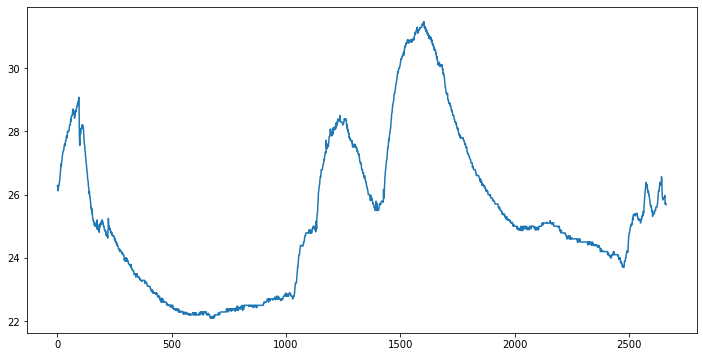

In [107]:
# Without the date index
# resizing all of the plots: 
# plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(df['Humidity'])

In [108]:
df.index = pd.DatetimeIndex(df['date'], freq='H')
df.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

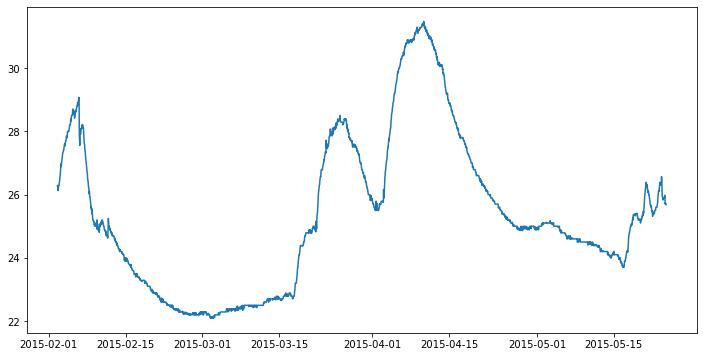

In [109]:
plt.plot(df['Humidity'])

### Changing the frequency of the data (Resampling)

In [110]:
df['Humidity'].resample('W').mean()

date
2015-02-08    27.529601
2015-02-15    24.591775
2015-02-22    23.049012
2015-03-01    22.288259
2015-03-08    22.308055
2015-03-15    22.601635
2015-03-22    24.315943
2015-03-29    27.812716
2015-04-05    26.966913
2015-04-12    30.874330
2015-04-19    28.281236
2015-04-26    25.749650
2015-05-03    24.996242
2015-05-10    24.668289
2015-05-17    24.174230
2015-05-24    25.638685
Freq: W-SUN, Name: Humidity, dtype: float64

In [111]:
help(df.resample)

Help on method resample in module pandas.core.generic:

resample(rule, axis=0, closed: Union[str, NoneType] = None, label: Union[str, NoneType] = None, convention: str = 'start', kind: Union[str, NoneType] = None, loffset=None, base: int = 0, on=None, level=None) method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time
    series. Object must have a datetime-like index (`DatetimeIndex`,
    `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
    to the `on` or `level` keyword.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-sampling. For `Series` this
        will default to 0, i.e. along the rows. Must be
        `DatetimeIndex`, `TimedeltaIndex` or `PeriodIndex`.
    closed : {'right', 'l

Options for resampling frequency:
    
- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- SM      semi-month end frequency (15th and end of month)
- Q       quarter end frequency
- A       year end frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds
- and more!

In [112]:
df['Humidity'].resample('M').mean()

date
2015-02-28    24.374582
2015-03-31    24.325819
2015-04-30    27.677441
2015-05-31    24.842351
Freq: M, Name: Humidity, dtype: float64

## First Differencing your data

In [113]:
df['Humidity_diff'] = df['Humidity'].diff()
print(df)
df.dropna(inplace = True)

                                   date  Temperature   Humidity       Light  \
date                                                                          
2015-02-02 14:00:00 2015-02-02 14:00:00    23.700000  26.272000  585.200000   
2015-02-02 15:00:00 2015-02-02 15:00:00    23.718000  26.290000  578.400000   
2015-02-02 16:00:00 2015-02-02 16:00:00    23.730000  26.230000  572.666667   
2015-02-02 17:00:00 2015-02-02 17:00:00    23.722500  26.125000  493.750000   
2015-02-02 18:00:00 2015-02-02 18:00:00    23.754000  26.200000  488.600000   
...                                 ...          ...        ...         ...   
2015-05-24 09:00:00 2015-05-24 09:00:00    24.290000  25.700000  808.000000   
2015-05-24 10:00:00 2015-05-24 10:00:00    24.330000  25.736000  809.800000   
2015-05-24 11:00:00 2015-05-24 11:00:00    24.330000  25.700000  817.000000   
2015-05-24 12:00:00 2015-05-24 12:00:00    24.356667  25.700000  813.000000   
2015-05-24 13:00:00 2015-05-24 13:00:00    24.408333

## Decomposing Time Series data

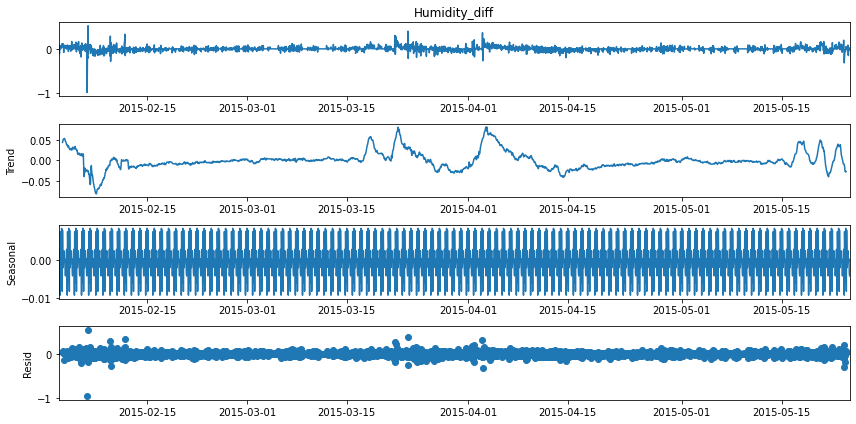

In [129]:
dec = sm.tsa.seasonal_decompose(df['Humidity'])

dec.plot()
plt.show()

## Checking for autocorrelation

In [131]:
df['Humidity'].autocorr()

0.9997365636761226

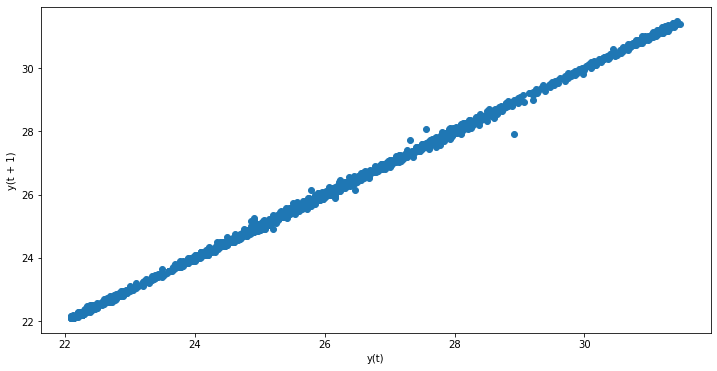

In [116]:
from pandas.plotting import lag_plot
lag_plot(df['Humidity'])

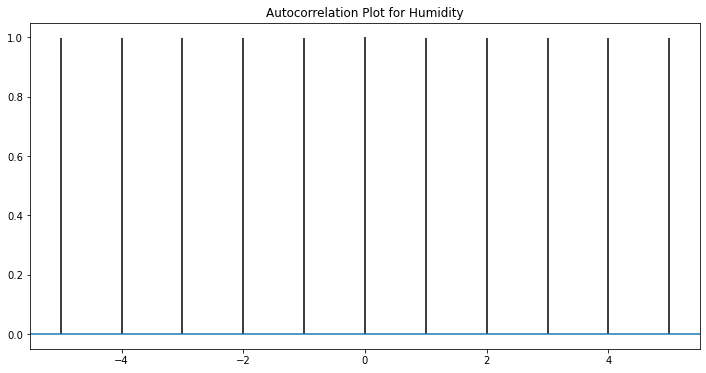

In [117]:
# Autocorrelation Plot

plt.acorr(df['Humidity'], maxlags = 5)
plt.title("Autocorrelation Plot for Humidity")

  
plt.show()  

## Applying Time Series models

In [133]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df['Humidity'], lags = 1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2663
Model:                     AutoReg(1)   Log Likelihood                3898.689
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Thu, 19 Nov 2020   AIC                             -5.765
Time:                        12:58:28   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.762
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0071      0.011      0.624      0.533      -0.015       0.029
Humidity.L1     0.9997      0.000   2247.322      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [119]:
help(AutoReg)

Help on class AutoReg in module statsmodels.tsa.ar_model:

class AutoReg(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  AutoReg(endog, lags, trend='c', seasonal=False, exog=None, hold_back=None, period=None, missing='none')
 |  
 |  Autoregressive AR-X(p) model.
 |  
 |  Estimate an AR-X model using Conditional Maximum Likelihood (OLS).
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The independent variable.
 |  lags : {int, list[int]}
 |      The number of lags to include in the model if an integer or the
 |      list of lag indices to include.  For example, [1, 4] will only
 |      include lags 1 and 4 while lags=4 will include lags 1, 2, 3, and 4.
 |  trend : {'n', 'c', 't', 'ct'}
 |      The trend to include in the model:
 |  
 |      * 'n' - No trend.
 |      * 'c' - Constant only.
 |      * 't' - Time trend only.
 |      * 'ct' - Constant and time trend.
 |  
 |  seasonal : bool
 |      Flag indicating whether to include

## Making Predictions

In order to assess the accuracy of our predictions, we will remove the last ten observations from the variable which we are using to train the model. Afterwards, we will then predict those ten observations, and see how close we got with our model to what happened in reality!

In [120]:
(train, test) = df.Humidity[:-10], df.Humidity[-10:]

model = AutoReg(df['Humidity'], lags = 1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2663
Model:                     AutoReg(1)   Log Likelihood                3898.689
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Thu, 19 Nov 2020   AIC                             -5.765
Time:                        12:57:47   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.762
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0071      0.011      0.624      0.533      -0.015       0.029
Humidity.L1     0.9997      0.000   2247.322      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [121]:
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

,Prediction,True Values
0,25.890000,25.889617
1,25.912000,25.889617
2,25.891667,25.911610
3,25.978000,25.891283
4,25.852000,25.977591
5,25.700000,25.851628
6,25.736000,25.699671
7,25.700000,25.735661
8,25.700000,25.699671
9,25.681667,25.699671


### Dickey Fuller Test for Stationarity

In [122]:
from statsmodels.tsa.stattools import adfuller
help(adfuller)
adfuller(df.Humidity)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

(-2.1559012689082246,
 0.22263806835588407,
 23,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7943.569888410115)

In [123]:
# On First Differences

adfuller(df['Humidity_diff'][1:])

(-5.929156941803512,
 2.4035285690791973e-07,
 22,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7936.868635028)

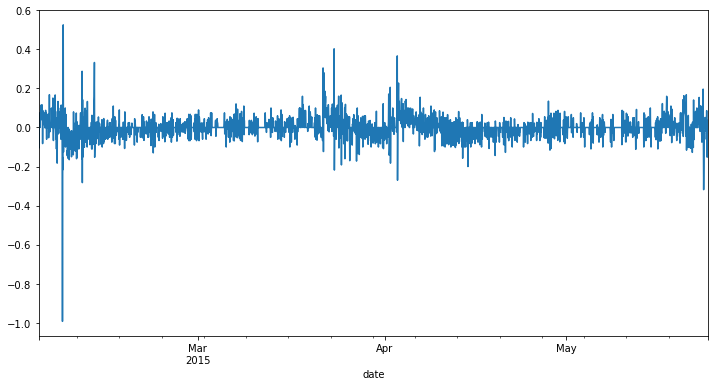

In [124]:
df['Humidity_diff'].plot()

## MA models

In [125]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df['CO2'], order=(0, 1)).fit()
print(model.params)

const        717.839682
ma.L1.CO2      0.992392
dtype: float64


In [126]:
(train, test) = df.CO2[:-10], df.CO2[-10:]

model = ARMA(df['CO2'], order=(0, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

,Prediction,True Values
0,1153.250000,909.931414
1,1152.400000,959.307167
2,1146.166667,909.463518
3,1145.400000,952.742058
4,1140.800000,909.031935
5,1150.250000,947.844519
6,1129.200000,918.705317
7,1125.800000,926.732978
8,1123.000000,915.392256
9,1124.000000,923.868003


## ARMA Models

In [127]:
model = ARMA(df['CO2'], order=(2, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


,Prediction,True Values
0,1153.250000,1153.107801
1,1152.400000,1153.828073
2,1146.166667,1152.855321
3,1145.400000,1146.188058
4,1140.800000,1145.342822
5,1150.250000,1140.442068
6,1129.200000,1150.447159
7,1125.800000,1128.101209
8,1123.000000,1124.545350
9,1124.000000,1121.636213


## Extra Pointer

For those who are especially interested in time series:

There is a further class of models called ARIMA models - this stands for Autoregressive Integrated Moving Average

The 'integrated' here refers to the number of times needed to difference a series in order to achieve stationarity.
So an ARMA model is equivalent to an ARIMA model of the same MA and AR orders with no differencing.

ARMA(p,q) is equivalent to ARIMA(p,0,q)


In [128]:
# Example:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Humidity'] ,order=(1,0,5)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2663
Model:                     ARMA(1, 5)   Log Likelihood                3956.320
Method:                       css-mle   S.D. of innovations              0.055
Date:                Thu, 19 Nov 2020   AIC                          -7896.639
Time:                        12:57:52   BIC                          -7849.542
Sample:                    02-02-2015   HQIC                         -7879.596
                         - 05-24-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.6992      1.454     17.670      0.000      22.849      28.550
ar.L1.Humidity     0.9994      0.000   2114.941      0.000       0.998       1.000
ma.L1.Humidity    -0.0358      0.019     -1.837      0.066      -0.074       0.002
ma.L2.Humidity     0.0644      0.020      3.274      0.001       0.026       0.103
ma.L3.Humidity     0.0227      0.018      1.255      0.209      -0.013       0.058
ma.L4.Humidity     0.1194      0.019      6.361      0.000       0.083       0.156
ma.L5.Humidity     0.1115      0.019      5.971      0.000       0.075       0.148
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1            1.0438           -0.9159j            1.3887           -0.1146
MA.2            1.0438           +0.9159j            1.3887            0.1146
MA.3           -0.6370           -1.4362j            1.5711           -0.3164
MA.4           -0.6370           +1.4362j            1.5711            0.3164
MA.5           -1.8845           -0.0000j            1.8845           -0.5000
-----------------------------------------------------------------------------
"""